# Monte Carlo Integration
    
Suppose want to know $F = \int^b_a f(x) dx$, but cannot calculate it for some reason. We can approximate it by evaluating $f(x)$ at enough points on the interval $[a, b]$ to give a good estimate of the mean density of the function on that interval, and then multiplying by the distance between the lower bound, $a$ and the upper bound, $b$.


### Step 1

### Sample a vector $\vec{X} = \begin{bmatrix} X_1 & X_2 & ... & X_n \end{bmatrix}$, where $X_i \overset{\text{iid}}{\sim} \text{Uniform}(a, b)$.

### Step 2

### Evaluate $\vec{Y} = \begin{bmatrix} f(X_1) & f(X_2) & ... & f(X_n) \end{bmatrix} = \begin{bmatrix} Y_1 & Y_2 & ... & Y_n \end{bmatrix}$.

### Step 3

### Approximate $F = \int^b_a f(x) dx$ with $F^*_{MC}$ by calculating $F^*_{MC} = (b - a) \frac{1}{n - 1} \Sigma^n_{i=1} Y_i$

The wider the interval, $[a, b]$, the more samples need to be taken. The less flat $f(x)$, the more samples need to be taken.

Source: https://cs.dartmouth.edu/~wjarosz/publications/dissertation/appendixA.pdf

In [1]:
import numpy as np
import typing

def mc_integrator(integrand, a: float, b: float, n: int, seed: int = 1) -> float:
    """
    This function takes in another function to integrate from a to b using
    Monte Carlo integration using n random draws from the inputted function.
    
    Inputs
    ----------
    integrand : Input function that is being integrated.
    a : Lower bound of the integral being approximated.
    b : Upper bound of the integral being approximated.
    n : Number of draws from the integrand to be used for the approximation.
    seed : Random seed used for the random number generator.
    
    Output
    ----------
    approx_integral : The approximation of the integral from a to b.
    """
    # Set a random seed for reproducibility.
    np.random.seed(seed)
    # Draw n numbers from a Uniform(a, b) distribution.
    u = np.random.uniform(low=a, high=b, size=n)
    # Apply the integrand function to the random draws.
    rand_draws = integrand(u)
    # Approximate the integral of the integrand on the interval from a to b.
    approx_integral = (b - a) * np.sum(rand_draws)/(len(rand_draws)-1)
    # Return the approximate integral.
    return approx_integral

## Testing

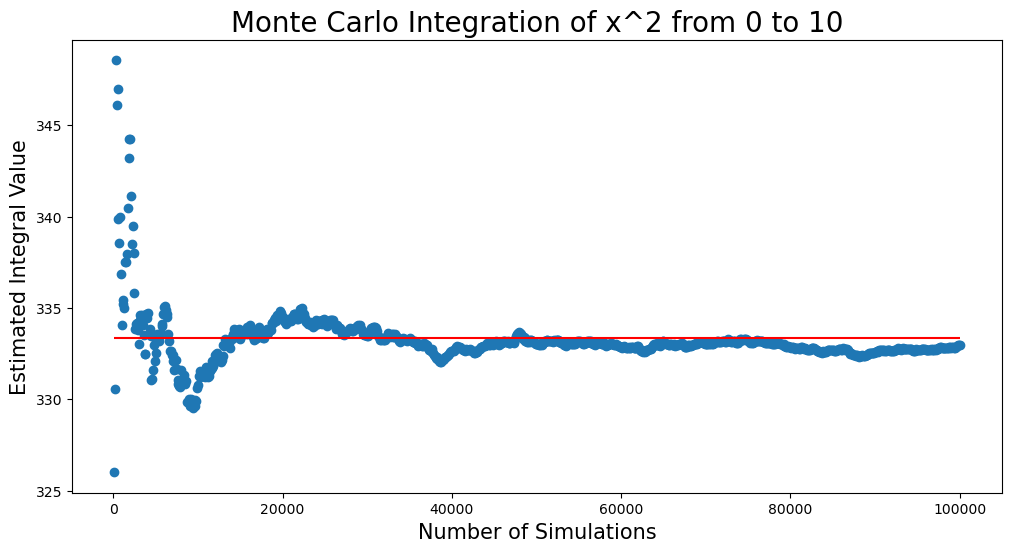

In [25]:
import matplotlib.pyplot as plt

def my_func(x: float) -> float:
    y = x**2
    return y

def my_func_antiderivative(x: float) -> float:
    exact_integral = (1/3) * (x**3)
    return exact_integral

def my_func_integral(a: float, b: float) -> float:
    exact_integral = my_func_antiderivative(b) - my_func_antiderivative(a)
    return exact_integral

a = 0
b = 10

exact_int = my_func_integral(a, b)
approx_int_list = []

n_list = np.arange(100, 100100, 100)

for n in n_list:
    approx_int_list.append(mc_integrator(my_func, a, b, n))
    
plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(n_list, approx_int_list)
plt.hlines(y=exact_int, xmin=n_list[0], xmax=n_list[-1], color='red')
plt.title('Monte Carlo Integration of x^2 from 0 to 10', fontsize=20)
plt.xlabel('Number of Simulations', fontsize=15)
plt.ylabel('Estimated Integral Value', fontsize=15)
plt.show()